# A simple parser for LTspice files

**Scott Prahl**

May 2022

This notebook shows a how some simple LTspice `.asc` circuit files may be converted to a simple netlist for use with the `lcapy` circuit analysis package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lcapy
import ltparser

#make matplotlib hires
%config InlineBackend.figure_format='retina'

## Simple Voltage Source and Resistor

Open an LTspice file and convert to a simple netlist.

In [2]:
lt = ltparser.LTspice()
lt.read('../tests/ltspice/simple1.asc')
lt.make_netlist()
print(lt.netlist)

W 3 2; right
W 3 4; down
W 2 5; down
W 7 6; down
W 9 8; down
W 6 8; right
W 6 0; down
V1 4 7 5.0; down
R1 5 9 1000.0; down



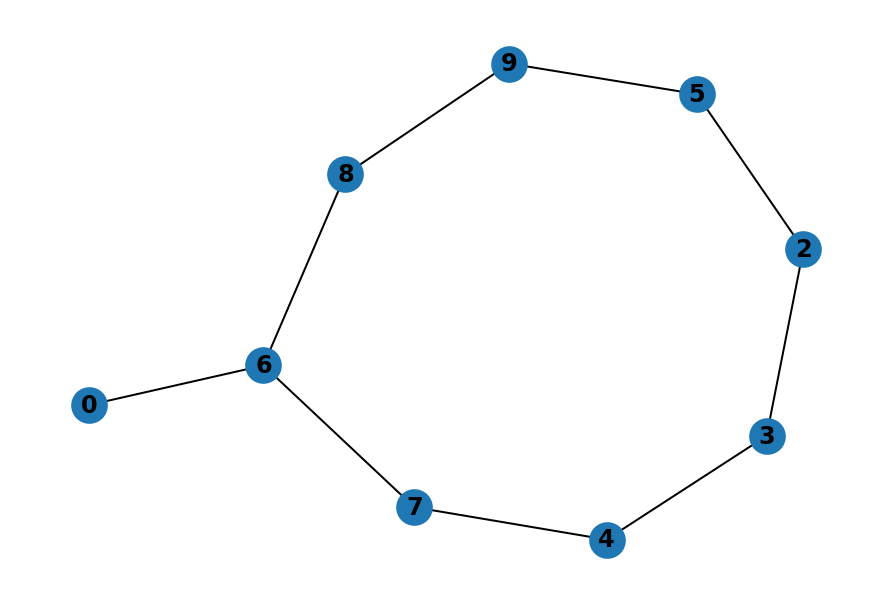

In [3]:
lt.make_graph()

The primary reason for this netlist is to allow us to use the `lcapy` package to draw the circuit and do some analysis.  Here we create a `lcapy.Circuit()` object and use that to draw the circuit.  The default settings are  not perfect, but allow us to directly visualize the circuit.

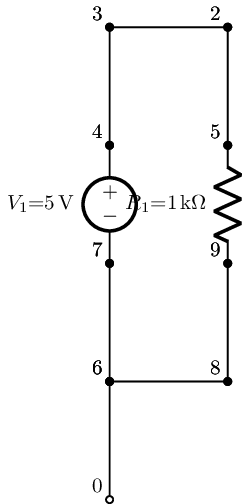

In [4]:
cct=lt.circuit()
cct.draw(scale=0.5)

Since we have the netlist, we can copy-and-paste the netlist to allow us to change the horizontal size and add a ground symbol.

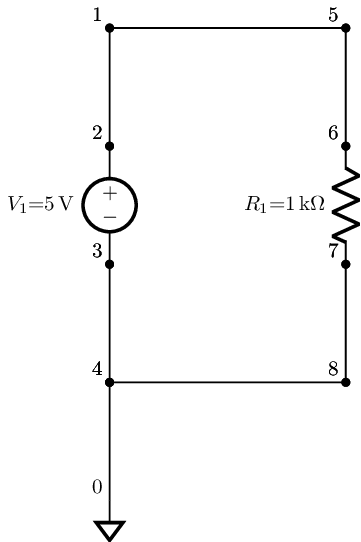

In [5]:
cct=lcapy.Circuit()
cct.add("""
W 5 1; left=2
W 2 1; up
W 6 5; up
W 4 3; up
W 8 7; up
W 8 4; left
W 0 4; up
V1 2 3 5.0; down
R1 6 7 1000.0; down
;autoground=True
""")
cct.draw(scale=0.5)

## An even simpler circuit

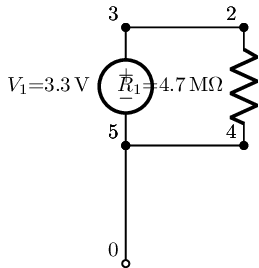

In [6]:
lt = ltparser.LTspice()
lt.read('../tests/ltspice/simple0.asc')
cct=lt.circuit()
cct.draw(scale=0.5)

## A circuit with multiple ground symbols

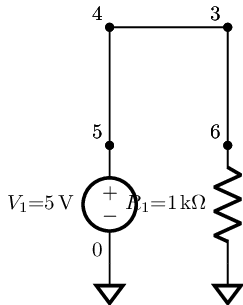

In [7]:
lt = ltparser.LTspice()
lt.read('../tests/ltspice/simple2.asc')
cct=lt.circuit()
cct.draw(scale=0.5)

## A resonant series circuit

got unicode error with utf-8 , trying different encoding


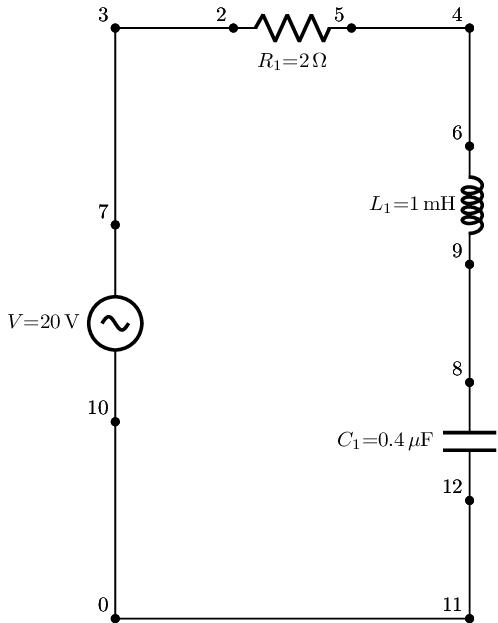

In [8]:
lt = ltparser.LTspice()
lt.read('../tests/ltspice/resonant-series.asc')
cct=lt.circuit()
cct.draw(scale=0.5)

## Circuit to make sure that voltage elements are oriented correctly

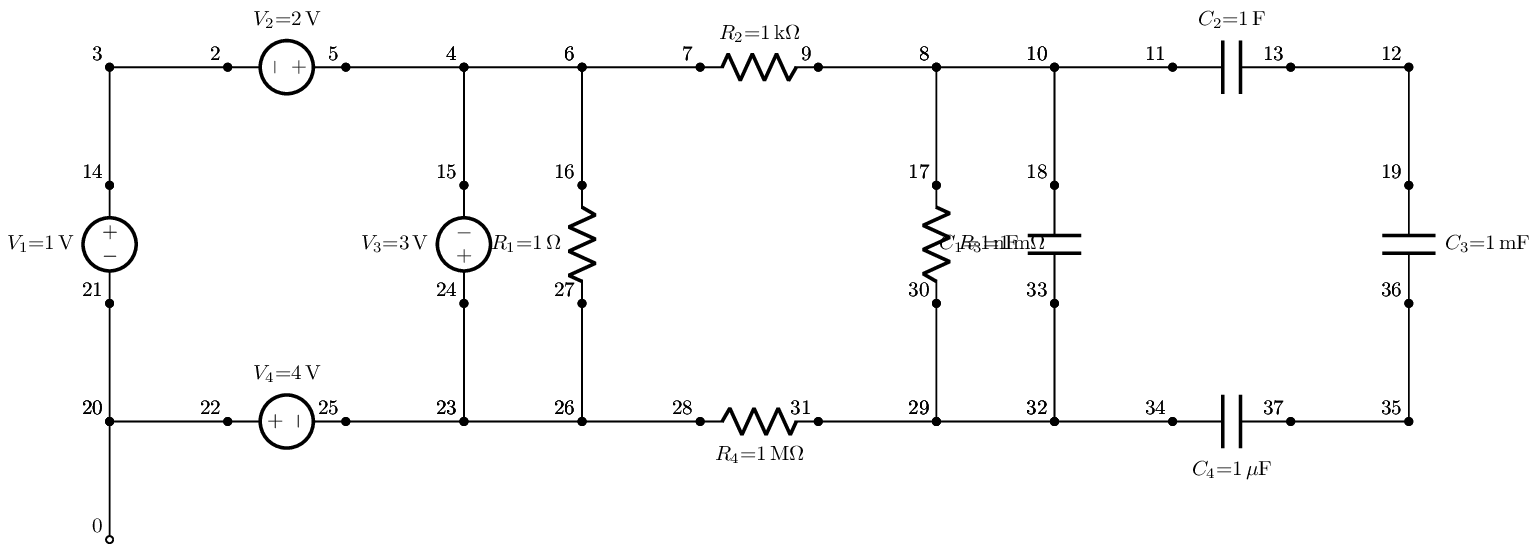

In [9]:
lt = ltparser.LTspice()
lt.read('../tests/ltspice/orientation-test.asc')
cct=lt.circuit()
cct.draw(scale=0.5)

## Circuit to make sure that current elements are oriented correctly

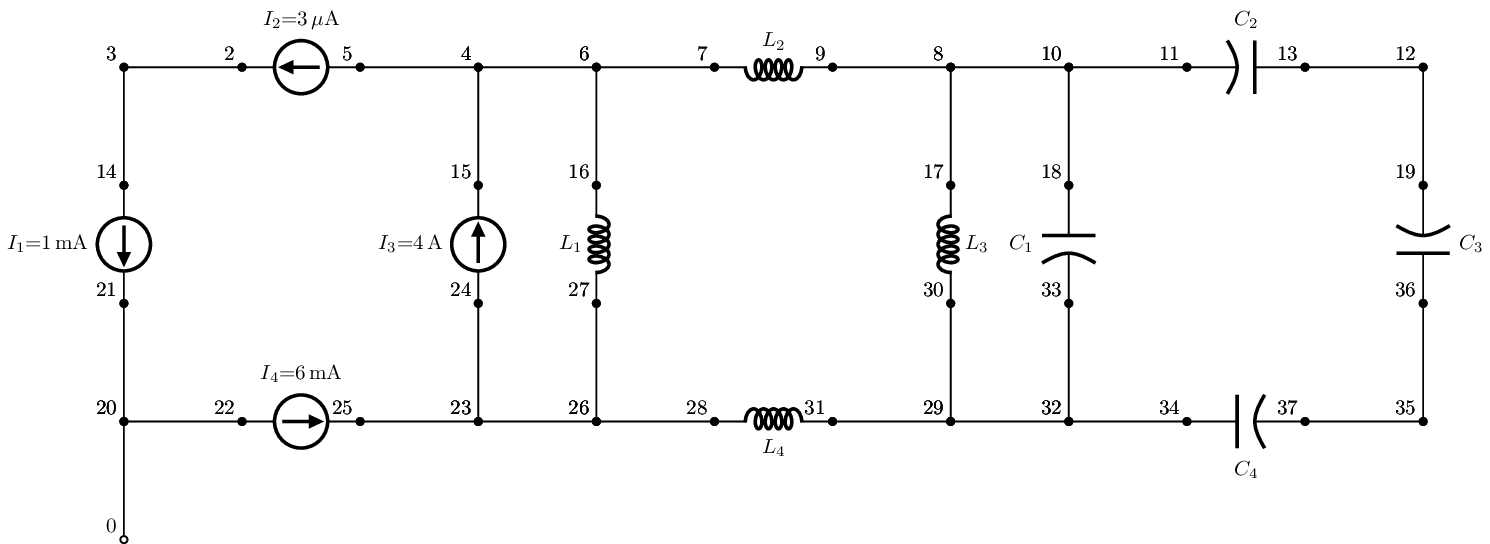

In [10]:
lt = ltparser.LTspice()
lt.read('../tests/ltspice/orientation-test2.asc')
cct=lt.circuit()
cct.draw(scale=0.5)

## Twin-T filter

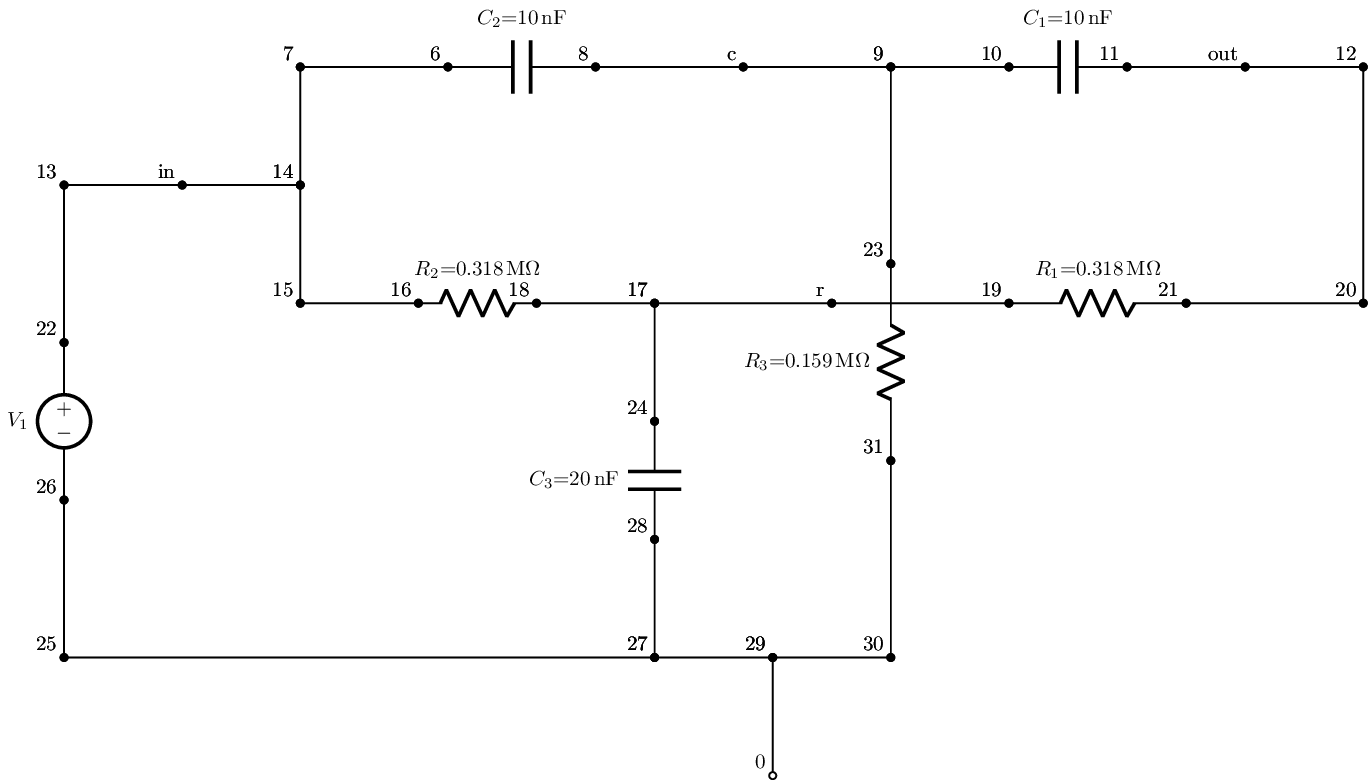

In [11]:
lt = ltparser.LTspice()
lt.read('../tests/ltspice/twin-t.asc')
cct=lt.circuit()
cct.draw(scale=0.5)

## Passive crossover circuit

This one has 'µ' in as part of labels.

got unicode error with utf-8 , trying different encoding


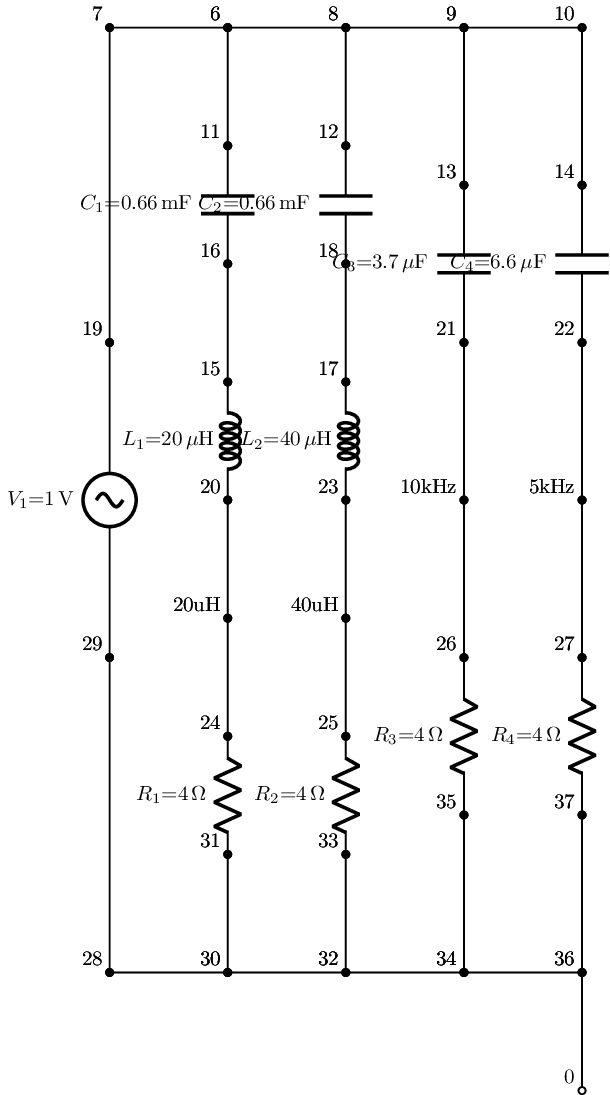

In [12]:
lt = ltparser.LTspice()
lt.read('../tests/ltspice/passive-crossover.asc')
cct=lt.circuit()
cct.draw(scale=0.5)